**19/12/2021**
<br>
Bruno Mazzilli González

> # Random Forest

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping. Esto implica que cada árbol se entrena con unos datos ligeramente distintos. En cada árbol individual, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")

### Importamos datos

In [2]:
X_train = pd.read_parquet('data/x_train.parquet')

X_test = pd.read_parquet('data/x_test.parquet')
X_test.reset_index(drop=True, inplace=True)

Y_train = pd.read_parquet('data/y_train.parquet')

Y_test = pd.read_parquet('data/y_test.parquet')
Y_test.reset_index(drop=True, inplace=True)

### Modelo Random Forest

Los modelos Random Forest están formados por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [3]:
%%time

#función del modelo. usamos los parametros que vienen por defecto excepto el numero de arboles ya que el tiempo de procesamiento es demasiado

random_forest = RandomForestClassifier(n_estimators = 50, # cantidad de arboles a crear
                                       n_jobs=-1,
                                       min_samples_split = 2,   # cantidad minima de observaciones para dividir un nodo
                                       min_samples_leaf  = 1,   # observaciones minimas que puede tener una hoja del arbol
 )

# Entrenamiento del modelo con dataset TRAIN
random_forest.fit(X_train, np.ravel(Y_train))

# Predicción del modelo con data set TEST
Y_pred_rf = random_forest.predict(X_test)

CPU times: user 36min 49s, sys: 33.1 s, total: 37min 22s
Wall time: 11min 40s


<br>

### Matriz de Confusión

In [4]:
def conf_matrix(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1474318
           1       0.39      0.25      0.30     24548

    accuracy                           0.98   1498866
   macro avg       0.69      0.62      0.65   1498866
weighted avg       0.98      0.98      0.98   1498866



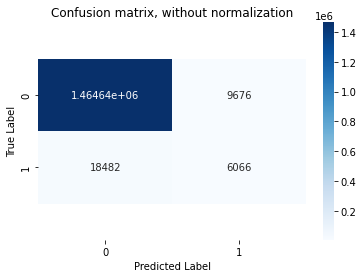

In [5]:
conf_matrix(Y_test, Y_pred_rf)
print(classification_report(Y_test, Y_pred_rf))

### Matriz de Confusión Normalizada

In [7]:
def conf_matrix_norm(Y_test, Y_pred): 
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred,  normalize='true')
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1474318
           1       0.39      0.25      0.30     24548

    accuracy                           0.98   1498866
   macro avg       0.69      0.62      0.65   1498866
weighted avg       0.98      0.98      0.98   1498866



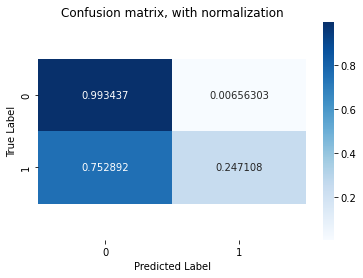

In [8]:
conf_matrix_norm(Y_test, Y_pred_rf)
print(classification_report(Y_test, Y_pred_rf))

### Curva ROC:

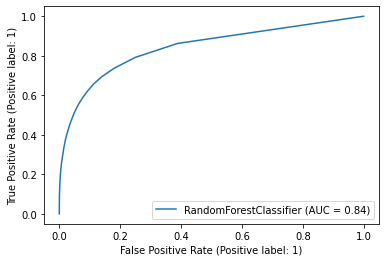

Random Forest score train:  0.9993769020216321
Random Forest score:  0.981213797631009


In [9]:
metrics.plot_roc_curve(random_forest, X_test, Y_test)                       # CURVA ROC
plt.show() 
print("Random Forest score train: ", random_forest.score(X_train, Y_train)) # score_train
print("Random Forest score: ", random_forest.score(X_test, Y_test))         # score_test

### Gain Curve:

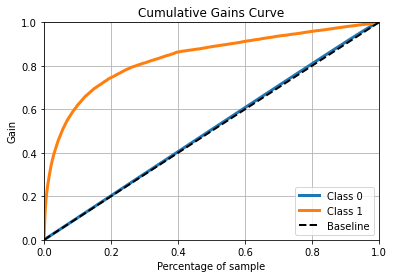

In [10]:
# Deriving Class probabilities
predicted_probabilities = random_forest.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probabilities);

### Feature importance

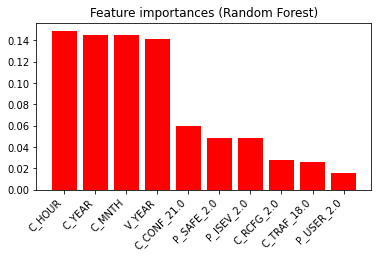

In [11]:
coefs = np.abs(random_forest.feature_importances_)
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

#### Guardamos el modelo

In [12]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [13]:
save_models('models/random_forest_model.pkl', random_forest )